In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



In [18]:
mnist=keras.datasets.mnist


In [19]:
(x_train,y_train),(x_test, y_test)=mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [20]:
#normalize data 0,255 -> 0,1
x_train, x_test=x_train/255.0, x_test/255.0

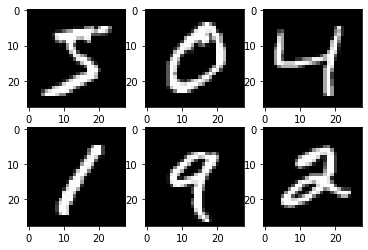

In [60]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [32]:
#model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10),
        
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [34]:
# #seceond method
# model=keras.Sequential() 
# model.add(keras.layers.Flatten(input_shape=(28,28)))
# model.summary()
# model.add(keras.layers.Dense(128, activation='relu'))
# model.summary()
# model.add(keras.layers.Dense(10))
# model.summary()


In [36]:
#loss and optimizer
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer=keras.optimizers.Adam(lr=0.001)
metrics=["accuracy"]

model.compile(loss=loss,optimizer=optimizer,metrics=metrics)



In [41]:
#training
batch_size=64
epochs=5

model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

Epoch 1/5
938/938 - 4s - loss: 0.0182 - accuracy: 0.9949
Epoch 2/5
938/938 - 4s - loss: 0.0140 - accuracy: 0.9964
Epoch 3/5
938/938 - 3s - loss: 0.0135 - accuracy: 0.9964
Epoch 4/5
938/938 - 3s - loss: 0.0104 - accuracy: 0.9973
Epoch 5/5
938/938 - 3s - loss: 0.0087 - accuracy: 0.9977


In [42]:
#evaluate
model.evaluate(x_test,y_test, batch_size=batch_size, verbose=2)

157/157 - 0s - loss: 0.0845 - accuracy: 0.9790


[0.08452925086021423, 0.9789999723434448]

In [45]:
#prediction
probability_model=keras.models.Sequential([
    model,
    keras.layers.Softmax()
])


In [59]:
#predictions
predictions=probability_model(x_test)
pred0=predictions[0:6]
print(pred0)
label0=np.argmax(pred0,axis=1)
print(label0)

tf.Tensor(
[[9.1177572e-11 1.8251902e-11 2.0722817e-08 2.3108851e-06 1.5453159e-14
  4.4674373e-10 4.6968099e-16 9.9999762e-01 2.6151765e-08 1.3490666e-08]
 [2.9283439e-13 6.0155130e-06 9.9999404e-01 5.8929737e-09 3.7638157e-23
  1.7441772e-09 9.4960442e-11 6.6355238e-17 1.3525830e-09 5.5614304e-17]
 [1.0429726e-08 9.9992287e-01 2.8632082e-06 1.6660627e-07 8.8849083e-07
  8.2958822e-09 2.5476591e-06 4.3911779e-05 2.6908732e-05 1.4069494e-08]
 [9.9999964e-01 2.7740110e-14 6.0962734e-08 3.3866954e-10 6.3304930e-12
  1.6001034e-10 3.6033484e-08 3.2634825e-10 3.4471837e-12 1.9127013e-07]
 [9.0486046e-10 1.4579186e-12 8.6143723e-09 4.7122735e-12 9.9775749e-01
  3.6972000e-10 1.0883746e-09 3.2098440e-06 6.6240791e-10 2.2392869e-03]
 [2.8660274e-11 9.9997687e-01 1.6213446e-10 2.3325695e-09 7.7722930e-08
  2.3087968e-12 2.4549174e-09 2.2632485e-05 3.2849584e-07 4.6285345e-10]], shape=(6, 10), dtype=float32)
[7 2 1 0 4 1]


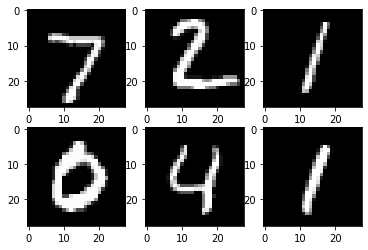

In [61]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[i], cmap='gray')
plt.show()